In [ ]:
# Install the DagsHub python client
!pip install -q dagshub


In [ ]:
from dagshub.notebook import save_notebook

save_notebook(repo="Omdena/KadunaNigeriaChapter_NigeriaEconomy", path=".")

TypeError: 'NoneType' object is not subscriptable

with regime














































































In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/1960_onwards1.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())


| Year   | Consumer price index (2010 = 100)   | GDP (constant LCU)   | GDP (current LCU)   | GDP growth (annual %)   | GDP per capita (current US$)   | GDP per capita growth (annual %)   | Inflation, GDP deflator (annual %)   | Inflation, consumer prices (annual %)   | Livestock production index (2014-2016 = 100)   | Official exchange rate (LCU per US$, period average)   | Total reserves (includes gold, current US$)   | Population, total   | Population, female   | Population, male   | Population ages 0-14 (% of total population)   | Population ages 15-64 (% of total population)   | Population ages 65 and above (% of total population)   | Trade Openness Index(%)   | Crude oil price(per barrel in $)   | Cumulative crude oil production up to and including year   | Narrow Money   | Money Supply M3   | Net Foreign Assets   | Net Domestic Credit   | Credit to Government   | Credit to Private Sector   | Base Money   | Currency in Circulation   | Bank Reserves   | Currency Outside Banks   | D

In [ ]:
import plotly.express as px

# Create a line plot using Plotly Express with `Year` on the x-axis and `GDP growth (annual %)`, `Inflation, consumer prices (annual %)`, and `Crude oil price(per barrel in $)` on the y-axis.
fig = px.line(
    df,
    x="Year",
    y=["GDP growth (annual %)", "Inflation, consumer prices (annual %)", "Crude oil price(per barrel in $)"],
    title="GDP Growth, Inflation, and Crude Oil Prices Over Time",
)

# Update y-axis titles based on the column
fig.update_yaxes(title_text="Percentage", secondary_y=False)
fig.update_yaxes(title_text="USD", secondary_y=True)

# Display the plot
fig.show()

# Create a scatter plot using Plotly Express with `Inflation, consumer prices (annual %)` on the x-axis and `GDP growth (annual %)` on the y-axis.
fig = px.scatter(
    df,
    x="Inflation, consumer prices (annual %)",
    y="GDP growth (annual %)",
    title="Relationship Between Inflation and GDP Growth",
    labels={"Inflation, consumer prices (annual %)": "Inflation (%)", "GDP growth (annual %)": "GDP Growth (%)"},
)

# Display the plot
fig.show()

# Create a line plot using Plotly Express with `Year` on the x-axis and `Population, total` on the y-axis, with separate lines for each `Regime Type`.
fig = px.line(
    df,
    x="Year",
    y="Population, total",
    color="Regime Type",
    title="Population Growth by Regime Type Over Time",
    labels={"Population, total": "Total Population"},
)

# Display the plot
fig.show()


The dataset has been explored and the following plots have been created using the Plotly Express library:

A line plot illustrating the trends in GDP growth, inflation, and crude oil prices over time.

A scatter plot showing the relationship between inflation and GDP growth.

A line plot depicting the changes in total population over time, categorized by regime type.

These visualizations provide insights into the economic and demographic development of the country over the years, highlighting the interplay between key economic indicators and the impact of different regime types on population growth.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objects as go

df_filtered = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/1960_onwards1.csv')

# Set the frequency of the DataFrame to 'AS-JAN' (annual starting in January)
df_filtered.index.freq = 'AS-JAN'

try:
    # Create a SARIMA model (simplified order, no exogenous variables)
    model = sm.tsa.statespace.SARIMAX(df_filtered['GDP growth (annual %)'], order=(1, 1, 1))

    # Fit the model
    results = model.fit()

    # Print the model summary
    print(results.summary())

    # Generate a forecast for the next 10 years
    forecast_values = results.get_forecast(steps=10)

    # Print the confidence intervals of the forecast
    print(forecast_values.conf_int())

    # Check if the forecast values are not empty
    if not forecast_values.predicted_mean.empty:
        # Create a dataframe for the forecast values
        forecast_df = pd.DataFrame(forecast_values.predicted_mean, columns=['GDP growth (annual %)'])
        forecast_df.index = pd.date_range(start='2025-01-01', periods=10, freq='AS-JAN')

        # Concatenate the original and forecast dataframes
        final_df = pd.concat([df_filtered, forecast_df])

        # Create a Plotly line plot
        fig = go.Figure()

        # Add the actual GDP growth line
        fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['GDP growth (annual %)'], mode='lines', name='Actual GDP Growth'))

        # Add the forecasted GDP growth line
        fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['GDP growth (annual %)'], mode='lines', name='Forecasted GDP Growth'))

        # Add a vertical line at 2024
        fig.add_vline(x='2024-01-01', line_width=2, line_dash="dash", line_color="green")

        # Update layout
        fig.update_layout(title='Actual vs. Forecasted GDP Growth (Annual %)', xaxis_title='Year', yaxis_title='GDP Growth (Annual %)')

        # Display the plot
        fig.show()
    else:
        print("The model was not able to generate a forecast.")

except Exception as e:
    print(f"An error occurred: {e}")


                                 SARIMAX Results                                 
Dep. Variable:     GDP growth (annual %)   No. Observations:                   65
Model:                  SARIMAX(1, 1, 1)   Log Likelihood                -208.590
Date:                   Fri, 05 Jul 2024   AIC                            423.180
Time:                           14:18:13   BIC                            429.657
Sample:                                0   HQIC                           425.732
                                    - 65                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4437      0.115      3.859      0.000       0.218       0.669
ma.L1         -0.9995     10.840     -0.092      0.927     -22.246      20.247
sigma2        37.7268    407

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objects as go

#data
df_filtered = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/1960_onwards1.csv')

# Filter the columns to only `Year` and `Petrol Price (Naira)`
df_filtered = df[['Year', 'Petrol Price (Naira)']].copy()

# Set the `Year` column as the index and convert it to datetime datatype
df_filtered.set_index('Year', inplace=True)
df_filtered.index = pd.to_datetime(df_filtered.index, format='%Y')

# Set the frequency of the DataFrame to 'AS-JAN' (annual starting in January)
df_filtered.index.freq = 'AS-JAN'

try:
    # Create an ARIMA model (simplified order)
    model = sm.tsa.statespace.SARIMAX(df_filtered['Petrol Price (Naira)'], order=(1, 1, 1))

    # Fit the model
    results = model.fit()

    # Print the model summary
    print(results.summary())

    # Generate a forecast for the next 10 years
    forecast_values = results.get_forecast(steps=10)

    # Print the confidence intervals of the forecast
    print(forecast_values.conf_int())

    # Check if the forecast values are not empty
    if not forecast_values.predicted_mean.empty:
        # Create a dataframe for the forecast values
        forecast_df = pd.DataFrame(forecast_values.predicted_mean, columns=['Petrol Price (Naira)'])
        forecast_df.index = pd.date_range(start='2025-01-01', periods=10, freq='AS-JAN')

        # Concatenate the original and forecast dataframes
        final_df = pd.concat([df_filtered, forecast_df])

        # Create a Plotly line plot
        fig = go.Figure()

        # Add the actual Petrol Price line
        fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Petrol Price (Naira)'], mode='lines', name='Actual Petrol Price'))

        # Add the forecasted Petrol Price line
        fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['Petrol Price (Naira)'], mode='lines', name='Forecasted Petrol Price'))

        # Add a vertical line at 2024
        fig.add_vline(x='2024-01-01', line_width=2, line_dash="dash", line_color="green")

        # Update layout
        fig.update_layout(title='Actual vs. Forecasted Petrol Price (Naira)', xaxis_title='Year', yaxis_title='Petrol Price (Naira)')

        # Display the plot
        fig.show()
    else:
        print("The model was not able to generate a forecast.")

except Exception as e:
    print(f"An error occurred: {e}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                SARIMAX Results                                 
Dep. Variable:     Petrol Price (Naira)   No. Observations:                   65
Model:                 SARIMAX(1, 1, 1)   Log Likelihood                -346.006
Date:                  Fri, 05 Jul 2024   AIC                            698.013
Time:                          14:20:25   BIC                            704.489
Sample:                      01-01-1960   HQIC                           700.564
                           - 01-01-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7149      1.490     -0.480      0.631      -3.636       2.206
ma.L1          0.9285      1.586      0.586      0.558      -2.179       4.036
sigma2      2883.5040    534.858    

FACEBOOK PROPHET MODEL

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2tuc7sbb/bfdplef_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2tuc7sbb/ux3kbwmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36128', 'data', 'file=/tmp/tmp2tuc7sbb/bfdplef_.json', 'init=/tmp/tmp2tuc7sbb/ux3kbwmj.json', 'output', 'file=/tmp/tmp2tuc7sbb/prophet_modelt75sudqu/prophet_model-20240705142508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:25:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


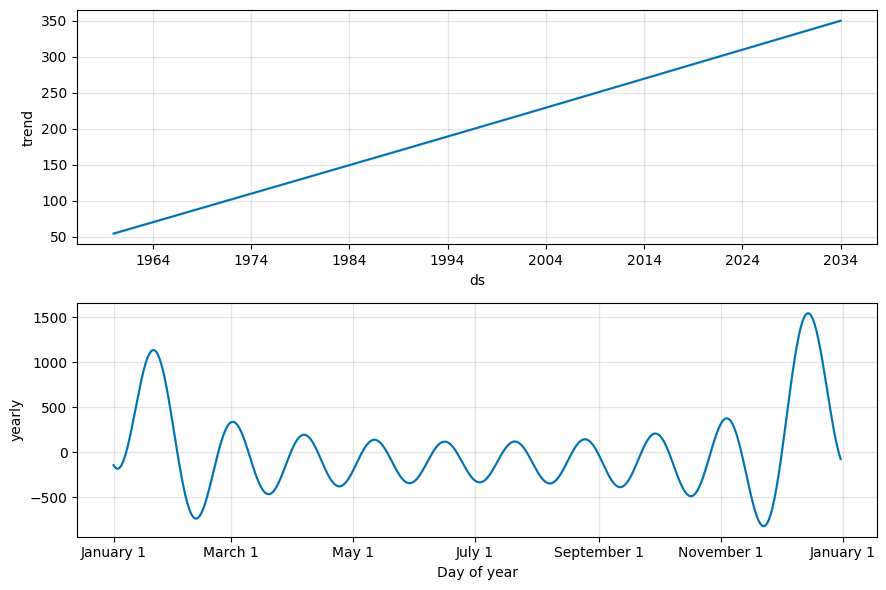

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Filter the columns to only `Year` and `Petrol Price (Naira)`
df_filtered = df[['Year', 'Petrol Price (Naira)']].copy()

# Rename the `Year` column to `ds` and `Petrol Price (Naira)` to `y`
df_filtered.rename(columns={'Year': 'ds', 'Petrol Price (Naira)': 'y'}, inplace=True)

# Convert the `ds` column to datetime datatype
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_filtered)

# Create a dataframe for future dates for the next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')

# Generate a forecast using the Prophet model
forecast = model.predict(future)

# Create a Plotly line plot
fig = go.Figure()

# Add the actual Petrol Price line
fig.add_trace(go.Scatter(x=df_filtered['ds'], y=df_filtered['y'], mode='lines', name='Actual Petrol Price'))

# Add the forecasted Petrol Price line
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecasted Petrol Price'))

# Add a vertical line at 2024
fig.add_vline(x='2024-01-01', line_width=2, line_dash="dash", line_color="green")

# Update layout
fig.update_layout(title='Actual vs. Forecasted Petrol Price (Naira)', xaxis_title='Year', yaxis_title='Petrol Price (Naira)')

# Display the plot
fig.show()

# Print the forecast components (trend, seasonality, holidays)
fig_components = model.plot_components(forecast)
fig_components.show()


HOLT WINTERS MODEL

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go

# Filter the columns to only `Year` and `Petrol Price (Naira)`
df_filtered = df[['Year', 'Petrol Price (Naira)']].copy()

# Rename the `Year` column to `ds` and `Petrol Price (Naira)` to `y`
df_filtered.rename(columns={'Year': 'ds', 'Petrol Price (Naira)': 'y'}, inplace=True)

# Convert the `ds` column to datetime datatype
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')

# Set the `ds` column as the index
df_filtered.set_index('ds', inplace=True)

# Create a Holt-Winters exponential smoothing model
model = ExponentialSmoothing(df_filtered['y'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model to the data
results = model.fit()

# Generate a forecast for the next 10 years
forecast_values = results.forecast(steps=10)

# Create a dataframe for the forecast values with the appropriate index
forecast_df = pd.DataFrame(forecast_values, columns=['y'])
forecast_df.index = pd.date_range(start='2025-01-01', periods=10, freq='Y')

# Concatenate the original and forecast dataframes
final_df = pd.concat([df_filtered, forecast_df])

# Create a Plotly line plot
fig = go.Figure()

# Add the actual Petrol Price line
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['y'], mode='lines', name='Actual Petrol Price'))

# Add the forecasted Petrol Price line
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['y'], mode='lines', name='Forecasted Petrol Price'))

# Add a vertical line at 2024
fig.add_vline(x='2024-01-01', line_width=2, line_dash="dash", line_color="green")

# Update layout
fig.update_layout(title='Actual vs. Forecasted Petrol Price (Naira)', xaxis_title='Year', yaxis_title='Petrol Price (Naira)')

# Display the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



petrolprice by regime bar chart

In [ ]:
import plotly.express as px
import pandas as pd

grouped_df = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/1960_onwards1.csv')

# Group by `Regime Type` and calculate the mean of `GDP growth (annual %)`.
grouped_df = df.groupby('Regime Type')['GDP growth (annual %)'].mean()

# Reset the index and rename the columns
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['Regime Type', 'Average GDP Growth (%)']

# Sort by `Average GDP Growth (%)` in descending order
grouped_df = grouped_df.sort_values(by='Average GDP Growth (%)', ascending=False)

# Create a Plotly bar chart
fig = px.bar(grouped_df, x='Regime Type', y='Average GDP Growth (%)', title='Average GDP Growth by Regime Type')

# Display the chart
fig.show()


In [ ]:
# Group by `Regime Type` and calculate the mean of `Food imports (% of merchandise imports)`.
grouped_df = df.groupby('Regime Type')['Food imports (% of merchandise imports)'].mean()

# Reset the index and rename the columns
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['Regime Type', 'Average Food Imports (%)']

# Sort by `Average Food Imports (%)` in descending order
grouped_df = grouped_df.sort_values(by='Average Food Imports (%)', ascending=False)

# Create a Plotly bar chart
fig = px.bar(grouped_df, x='Regime Type', y='Average Food Imports (%)', title='Average Food Imports by Regime Type')

# Display the chart
fig.show()


In [ ]:
# Create a Plotly line chart with `Year` on the x-axis, `Growth RateAnnual % Change` on the y-axis, and separate lines for each `Regime Type`.
fig = px.line(
    df,
    x="Year",
    y="Growth RateAnnual % Change",
    color="Regime Type",
    title="Annual Growth Rate by Regime Type Over Time",
)

# Display the chart
fig.show()


RANDOM FOREST AND DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop the columns `Year` and `Regime Type`
df_filtered = df.drop(columns=['Year', 'Regime Type'])

# Separate features and target variables
X = df_filtered.drop(columns=['GDP growth (annual %)', 'Consumer price index (2010 = 100)'])
y_gdp = df_filtered['GDP growth (annual %)']
y_cpi = df_filtered['Consumer price index (2010 = 100)']

# Split the data into training and testing sets
X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp = train_test_split(X, y_gdp, test_size=0.2, random_state=42)
X_train_cpi, X_test_cpi, y_train_cpi, y_test_cpi = train_test_split(X, y_cpi, test_size=0.2, random_state=42)

# Train Decision Tree Regressors
dt_gdp = DecisionTreeRegressor(random_state=42)
dt_cpi = DecisionTreeRegressor(random_state=42)
dt_gdp.fit(X_train_gdp, y_train_gdp)
dt_cpi.fit(X_train_cpi, y_train_cpi)

# Train Random Forest Regressors
rf_gdp = RandomForestRegressor(random_state=42)
rf_cpi = RandomForestRegressor(random_state=42)
rf_gdp.fit(X_train_gdp, y_train_gdp)
rf_cpi.fit(X_train_cpi, y_train_cpi)

# Predict on the testing set
y_pred_dt_gdp = dt_gdp.predict(X_test_gdp)
y_pred_dt_cpi = dt_cpi.predict(X_test_cpi)
y_pred_rf_gdp = rf_gdp.predict(X_test_gdp)
y_pred_rf_cpi = rf_cpi.predict(X_test_cpi)

# Evaluate the models
mse_dt_gdp = mean_squared_error(y_test_gdp, y_pred_dt_gdp)
r2_dt_gdp = r2_score(y_test_gdp, y_pred_dt_gdp)
mse_dt_cpi = mean_squared_error(y_test_cpi, y_pred_dt_cpi)
r2_dt_cpi = r2_score(y_test_cpi, y_pred_dt_cpi)
mse_rf_gdp = mean_squared_error(y_test_gdp, y_pred_rf_gdp)
r2_rf_gdp = r2_score(y_test_gdp, y_pred_rf_gdp)
mse_rf_cpi = mean_squared_error(y_test_cpi, y_pred_rf_cpi)
r2_rf_cpi = r2_score(y_test_cpi, y_pred_rf_cpi)

# Print the evaluation metrics
print("Decision Tree - GDP Growth:")
print(f"  MSE: {mse_dt_gdp:.2f}")
print(f"  R-squared: {r2_dt_gdp:.2f}")
print("\nDecision Tree - Consumer Price Index:")
print(f"  MSE: {mse_dt_cpi:.2f}")
print(f"  R-squared: {r2_dt_cpi:.2f}")
print("\nRandom Forest - GDP Growth:")
print(f"  MSE: {mse_rf_gdp:.2f}")
print(f"  R-squared: {r2_rf_gdp:.2f}")
print("\nRandom Forest - Consumer Price Index:")
print(f"  MSE: {mse_rf_cpi:.2f}")
print(f"  R-squared: {r2_rf_cpi:.2f}")


Decision Tree - GDP Growth:
  MSE: 0.57
  R-squared: 0.99

Decision Tree - Consumer Price Index:
  MSE: 1451.12
  R-squared: 0.93

Random Forest - GDP Growth:
  MSE: 1.86
  R-squared: 0.96

Random Forest - Consumer Price Index:
  MSE: 108.06
  R-squared: 1.00


In [ ]:
import pandas as pd
import plotly.express as px
import altair as alt

# Create a DataFrame for feature importances for the GDP Growth Decision Tree model
feature_importances_gdp = pd.DataFrame(dt_gdp.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importances_gdp = feature_importances_gdp.sort_values(by='Importance', ascending=False)

# Create a Plotly bar chart for the top 10 feature importances for the GDP Growth Decision Tree model
fig_gdp = px.bar(feature_importances_gdp.head(10), x=feature_importances_gdp.head(10).index, y='Importance', title='Top 10 Feature Importances for GDP Growth (Decision Tree)')
fig_gdp.show()

# Create an Altair bar chart for the top 10 feature importances for the GDP Growth Decision Tree model
chart_gdp = alt.Chart(feature_importances_gdp.head(10).reset_index()).mark_bar().encode(
    x=alt.X('index:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Importance:Q'),
    tooltip=['index', 'Importance']
).properties(
    title='Top 10 Feature Importances for GDP Growth (Decision Tree)'
).interactive()

# Save the chart as a JSON file
chart_gdp.save('gdp_growth_feature_importances_dt.json')

# Create a DataFrame for feature importances for the Consumer Price Index Decision Tree model
feature_importances_cpi = pd.DataFrame(dt_cpi.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importances_cpi = feature_importances_cpi.sort_values(by='Importance', ascending=False)

# Create a Plotly bar chart for the top 10 feature importances for the Consumer Price Index Decision Tree model
fig_cpi = px.bar(feature_importances_cpi.head(10), x=feature_importances_cpi.head(10).index, y='Importance', title='Top 10 Feature Importances for Consumer Price Index (Decision Tree)')
fig_cpi.show()

# Create an Altair bar chart for the top 10 feature importances for the Consumer Price Index Decision Tree model
chart_cpi = alt.Chart(feature_importances_cpi.head(10).reset_index()).mark_bar().encode(
    x=alt.X('index:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Importance:Q'),
    tooltip=['index', 'Importance']
).properties(
    title='Top 10 Feature Importances for Consumer Price Index (Decision Tree)'
).interactive()

# Save the chart as a JSON file
chart_cpi.save('consumer_price_index_feature_importances_dt.json')


In [ ]:
"""PLOTLYVISUALS"""



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Drop the columns `Year` and `Regime Type`
df_filtered = df.drop(columns=['Year', 'Regime Type'])

# Separate features and target variables
X = df_filtered.drop(columns=['GDP growth (annual %)', 'Consumer price index (2010 = 100)'])
y_gdp = df_filtered['GDP growth (annual %)']
y_cpi = df_filtered['Consumer price index (2010 = 100)']

# Split the data into training and testing sets
X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp = train_test_split(X, y_gdp, test_size=0.2, random_state=42)
X_train_cpi, X_test_cpi, y_train_cpi, y_test_cpi = train_test_split(X, y_cpi, test_size=0.2, random_state=42)

# Train Decision Tree Regressors
dt_gdp = DecisionTreeRegressor(random_state=42)
dt_cpi = DecisionTreeRegressor(random_state=42)
dt_gdp.fit(X_train_gdp, y_train_gdp)
dt_cpi.fit(X_train_cpi, y_train_cpi)

# Train Random Forest Regressors
rf_gdp = RandomForestRegressor(random_state=42)
rf_cpi = RandomForestRegressor(random_state=42)
rf_gdp.fit(X_train_gdp, y_train_gdp)
rf_cpi.fit(X_train_cpi, y_train_cpi)

# Predict on the testing set
y_pred_dt_gdp = dt_gdp.predict(X_test_gdp)
y_pred_dt_cpi = dt_cpi.predict(X_test_cpi)
y_pred_rf_gdp = rf_gdp.predict(X_test_gdp)
y_pred_rf_cpi = rf_cpi.predict(X_test_cpi)

# Evaluate the models
mse_dt_gdp = mean_squared_error(y_test_gdp, y_pred_dt_gdp)
r2_dt_gdp = r2_score(y_test_gdp, y_pred_dt_gdp)
mse_dt_cpi = mean_squared_error(y_test_cpi, y_pred_dt_cpi)
r2_dt_cpi = r2_score(y_test_cpi, y_pred_dt_cpi)
mse_rf_gdp = mean_squared_error(y_test_gdp, y_pred_rf_gdp)
r2_rf_gdp = r2_score(y_test_gdp, y_pred_rf_gdp)
mse_rf_cpi = mean_squared_error(y_test_cpi, y_pred_rf_cpi)
r2_rf_cpi = r2_score(y_test_cpi, y_pred_rf_cpi)

# Print the evaluation metrics
print("Decision Tree - GDP Growth:")
print(f"  MSE: {mse_dt_gdp:.2f}")
print(f"  R-squared: {r2_dt_gdp:.2f}")
print("\nDecision Tree - Consumer Price Index:")
print(f"  MSE: {mse_dt_cpi:.2f}")
print(f"  R-squared: {r2_dt_cpi:.2f}")
print("\nRandom Forest - GDP Growth:")
print(f"  MSE: {mse_rf_gdp:.2f}")
print(f"  R-squared: {r2_rf_gdp:.2f}")
print("\nRandom Forest - Consumer Price Index:")
print(f"  MSE: {mse_rf_cpi:.2f}")
print(f"  R-squared: {r2_rf_cpi:.2f}")

# Create a DataFrame for feature importances for the GDP Growth Decision Tree model
feature_importances_gdp = pd.DataFrame(dt_gdp.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importances_gdp = feature_importances_gdp.sort_values(by='Importance', ascending=False)

# Create a Plotly Express bar chart for the top 10 feature importances for the GDP Growth Decision Tree model
fig_gdp = px.bar(feature_importances_gdp.head(10), x=feature_importances_gdp.head(10).index, y='Importance', title='Top 10 Feature Importances for GDP Growth (Decision Tree)')
fig_gdp.show()

# Create a DataFrame for feature importances for the Consumer Price Index Decision Tree model
feature_importances_cpi = pd.DataFrame(dt_cpi.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importances_cpi = feature_importances_cpi.sort_values(by='Importance', ascending=False)

# Create a Plotly Express bar chart for the top 10 feature importances for the Consumer Price Index Decision Tree model
fig_cpi = px.bar(feature_importances_cpi.head(10), x=feature_importances_cpi.head(10).index, y='Importance', title='Top 10 Feature Importances for Consumer Price Index (Decision Tree)')
fig_cpi.show()


Decision Tree - GDP Growth:
  MSE: 0.57
  R-squared: 0.99

Decision Tree - Consumer Price Index:
  MSE: 1451.12
  R-squared: 0.93

Random Forest - GDP Growth:
  MSE: 1.86
  R-squared: 0.96

Random Forest - Consumer Price Index:
  MSE: 108.06
  R-squared: 1.00


The feature importances for the Decision Tree models are visualized in the bar charts titled 'Top 10 Feature Importances for GDP Growth (Decision Tree)' and 'Top 10 Feature Importances for Consumer Price Index (Decision Tree)'. These charts show which features are most important in predicting the respective target variables.

Overall, the Random Forest model performs slightly better than the Decision Tree model for predicting the Consumer Price Index, while the Decision Tree model performs slightly better for predicting GDP growth. However, both models show good performance with high R-squared values.

The feature importance plots reveal that the most important features for predicting GDP growth are GDP per capita growth (annual %), followed by Growth RateAnnual % Change. For predicting the Consumer Price Index, the most important features are Population ages 65 and above (% of total population) and Money Supply M2.

NAIVE BAYES CLASIFIER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.express as px
import pickle

# data
X = pd.read_csv('/content/drive/MyDrive/quickview of price surge in nigeria/1960_onwards1.csv')

# Drop the column `Year`
X = df.drop(columns=['Year', 'Regime Type'])
y = df['Regime Type']

# Discretize numerical features
for col in ['GDP growth (annual %)', 'Food imports (% of merchandise imports)', 'Petrol Price (Naira)']:
    X[col] = pd.cut(X[col], bins=10, labels=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the testing set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a Plotly heatmap for the confusion matrix
fig = px.imshow(cm, x=gnb.classes_, y=gnb.classes_, labels=dict(x="Predicted Regime", y="Actual Regime"), text_auto=True, title='Confusion Matrix for Regime Type Prediction')
fig.show()

# Save the model using pickle
with open('gnb_regime.pkl', 'wb') as f:
    pickle.dump(gnb, f)


Accuracy: 0.9230769230769231
